In [1]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "datasets", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:] #petal length and width
y=iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

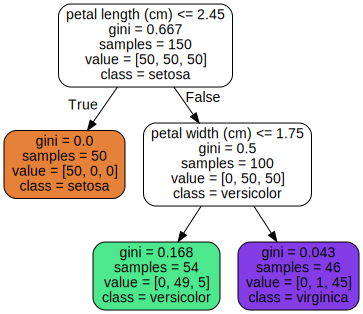

In [3]:
from sklearn.tree import export_graphviz
#분류 트리
export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

import graphviz
with open("datasets/decision_trees/iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='datasets/decision_trees', cleanup=True)
dot

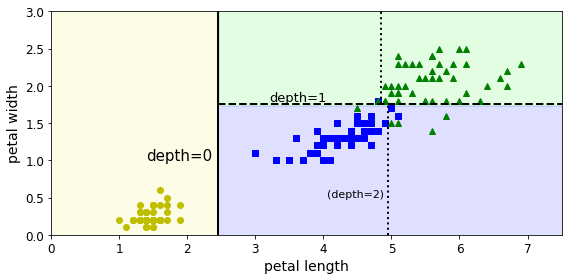

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length", fontsize=14)
        plt.ylabel("petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "depth=0", fontsize=15)
plt.text(3.2, 1.80, "depth=1", fontsize=13)
plt.text(4.05, 0.5, "(depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [8]:
# length=5, width=1.5 일때 각 클래스에 속할 확률
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5,1.5]])

array([1])

In [10]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[4.8, 1.8]])

In [11]:
#훈련세트에 매우 민감함
# iris-versicolor의 가장 너비가 큰 데이터를 제거하여 훈련
not_widest_versicolor=(X[:,1]!=1.8)|(y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_tweaked.fit(X_tweaked,y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

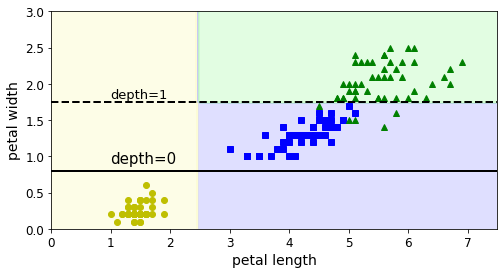

In [12]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0,7.5],[0.8,0.8],"k-",linewidth=2)
plt.plot([0,7.5],[1.75,1.75],"k--",linewidth=2)
plt.text(1.0,0.9,"depth=0" , fontsize=15)
plt.text(1.0,1.80,"depth=1" , fontsize=13)
plt.show()
#위와 매우 다른 모양임을 알 수 있음

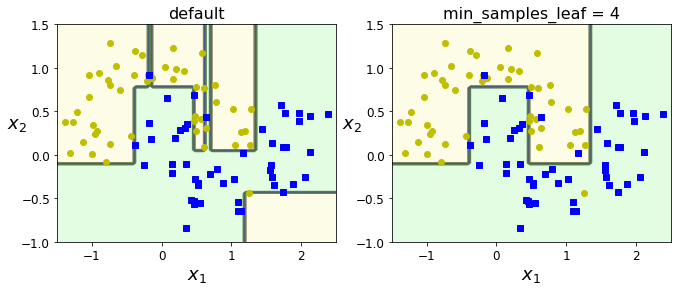

In [18]:
from sklearn.datasets import make_moons
Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=53)
#decision tree모델은 비파라미터 모델이므로 규제를 통해 과대적합을 피한다
# min_ 값이 클수록, max_값이 작을수록 규제가 더 커진다
deep_tree_clf1=DecisionTreeClassifier(random_state=42)
deep_tree_clf2=DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1,Xm,ym,axes=[-1.5,2.5,-1,1.5],iris=False)
plt.title("default",fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2,Xm,ym,axes=[-1.5,2.5,-1,1.5],iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf),fontsize=16)

plt.show()

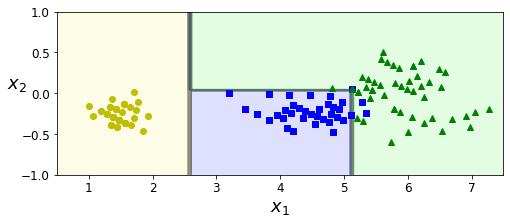

In [21]:
angle = np.pi / 180*20
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
Xr=X.dot(rotation_matrix)

tree_clf_r=DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr,y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r,Xr,y,axes=[0.5,7.5,-1.0,1],iris=False)
plt.show()

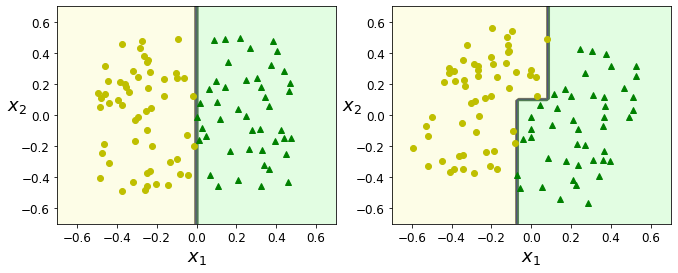

In [23]:
np.random.seed(6)
Xs=np.random.rand(100,2)-0.5
ys=(Xs[:,0]>0).astype(np.float32)*2

angle=np.pi/4
Xsr=Xs.dot(rotation_matrix)

tree_clf_s=DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs,ys)
tree_clf_sr=DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr,Xsr,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.show()
# 데이터셋을 45도 회전시켰더니 결정트리가 불필요하게 구불구불하게 변함
# 훈련세트의 회전에 민감하다

In [24]:
#회귀 트리
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2
y=y+np.random.randn(m,1)/10 # 잡음 추가

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

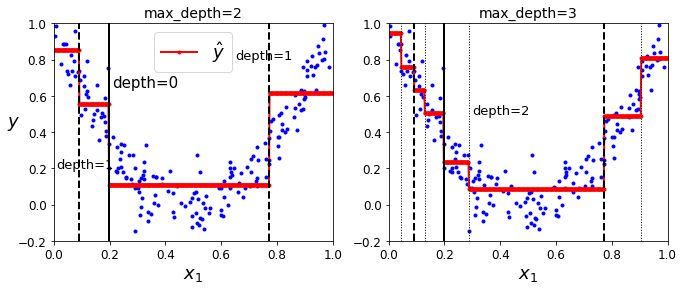

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1=DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg2=DecisionTreeRegressor(random_state=42,max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "depth=0", fontsize=15)
plt.text(0.01, 0.2, "depth=1", fontsize=13)
plt.text(0.65, 0.8, "depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

In [28]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

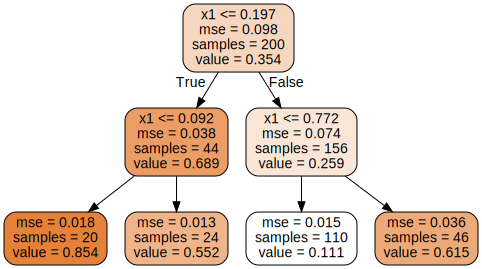

In [29]:
import graphviz
with open("/images/decision_trees/regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='regression_tree', directory='/images/decision_trees', cleanup=True)
dot

Text(0.5, 1.0, 'min_samples_leaf=10')

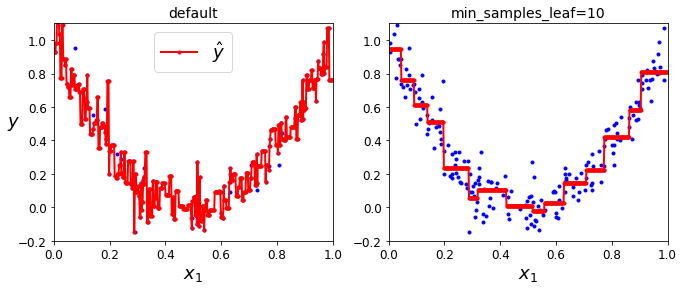

In [31]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42,min_samples_leaf=10)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

x1=np.linspace(0,1,500).reshape(-1,1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("default", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

# 연습 문제

In [32]:
X,y=make_moons(n_samples=1000,noise=0.4,random_state=42)

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV

params={"max_leaf_nodes":list(range(2,100)),"min_samples_split":[2,3,4]}
grid_search_cv=GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=3,verbose=1,n_jobs=-1)
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    5.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [39]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [43]:
from sklearn.metrics import accuracy_score
# GridSearchCV 의 디폴트 값은 훈련세트로 찾은 최적의 모델
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.855

In [44]:
from sklearn.model_selection import ShuffleSplit

n_trees=1000
n_instances=100

mini_sets=[]

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train)-n_instances, random_state=42)
for mini_train_idx, mini_test_idx in rs.split(X_train):
    X_mini_train=X_train[mini_train_idx]
    y_mini_train=y_train[mini_train_idx]
    mini_sets.append((X_mini_train,y_mini_train))

In [47]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train,y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    
    y_pred=tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

# 더 작은 데이터셋에서 훈련되었기 때문에 앞보다 정확도가 더 낮음
np.mean(accuracy_scores)

0.817115

In [49]:
Y_pred=np.empty([n_trees, len(X_test)],dtype=np.uint8)
# 1000개의 결정 트리 예측 중 다수로 나온 예측만 취한다
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [50]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred,axis=0)

In [53]:
accuracy_score(y_test,y_pred_majority_votes.reshape([-1]))

0.85